In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import math
import datetime as dt
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

In [24]:
df = pd.read_csv('weather-sa-2017-2019-clean.csv', parse_dates=['date', 'time', 'year', 'month', 'day', 'hour','minute'])
df

,Unnamed: 0,city,date,time,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,2017-01-01,2024-08-21 00:00:00,2017-01-01,1,1,24,0,Clear,17,11,64%,1018.0,16
1,1,Qassim,2017-01-01,2024-08-21 01:00:00,2017-01-01,1,1,1,0,Clear,17,6,64%,1018.0,16
2,2,Qassim,2017-01-01,2024-08-21 03:00:00,2017-01-01,1,1,3,0,Clear,15,11,72%,1019.0,16
3,3,Qassim,2017-01-01,2024-08-21 04:00:00,2017-01-01,1,1,4,0,Clear,15,11,72%,1019.0,16
4,4,Qassim,2017-01-01,2024-08-21 05:00:00,2017-01-01,1,1,5,0,Clear,15,9,72%,1019.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249018,2848,Jawf,2019-04-30,2024-08-21 19:00:00,2019-01-01,4,30,19,0,Passing clouds,32,19,14%,1014.0,-1
249019,2849,Jawf,2019-04-30,2024-08-21 20:00:00,2019-01-01,4,30,20,0,Passing clouds,29,9,22%,1015.0,-1
249020,2850,Jawf,2019-04-30,2024-08-21 21:00:00,2019-01-01,4,30,21,0,Passing clouds,27,7,24%,1016.0,-1
249021,2851,Jawf,2019-04-30,2024-08-21 22:00:00,2019-01-01,4,30,22,0,Clear,26,0,26%,1017.0,16


In [25]:
df['date'] = df['time']
df.drop(columns='time', axis=1, inplace=True)

In [27]:
df.shape

(249023, 14)

In [12]:
df.columns

Index(['Unnamed: 0', 'city', 'time', 'year', 'month', 'day', 'hour', 'minute',
       'weather', 'temp', 'wind', 'humidity', 'barometer', 'visibility'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  249023 non-null  int64         
 1   city        249023 non-null  object        
 2   time        249023 non-null  datetime64[ns]
 3   year        249023 non-null  datetime64[ns]
 4   month       249023 non-null  object        
 5   day         249023 non-null  object        
 6   hour        249023 non-null  object        
 7   minute      249023 non-null  object        
 8   weather     249023 non-null  object        
 9   temp        249023 non-null  int64         
 10  wind        249023 non-null  int64         
 11  humidity    249006 non-null  object        
 12  barometer   248951 non-null  float64       
 13  visibility  249023 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(4), object(7)
memory usage: 26.6+ MB


In [9]:
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249023 entries, 0 to 249022
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Unnamed: 0  249023 non-null  int64         
 1   city        249023 non-null  object        
 2   date        249023 non-null  datetime64[ns]
 3   time        249023 non-null  datetime64[ns]
 4   year        249023 non-null  datetime64[ns]
 5   month       249023 non-null  int32         
 6   day         249023 non-null  int32         
 7   hour        249023 non-null  int32         
 8   minute      249023 non-null  int32         
 9   weather     249023 non-null  object        
 10  temp        249023 non-null  int64         
 11  wind        249023 non-null  int64         
 12  humidity    249006 non-null  object        
 13  barometer   248951 non-null  float64       
 14  visibility  249023 non-null  int64         
dtypes: datetime64[ns](3), float64(1), int32(4), int64(4

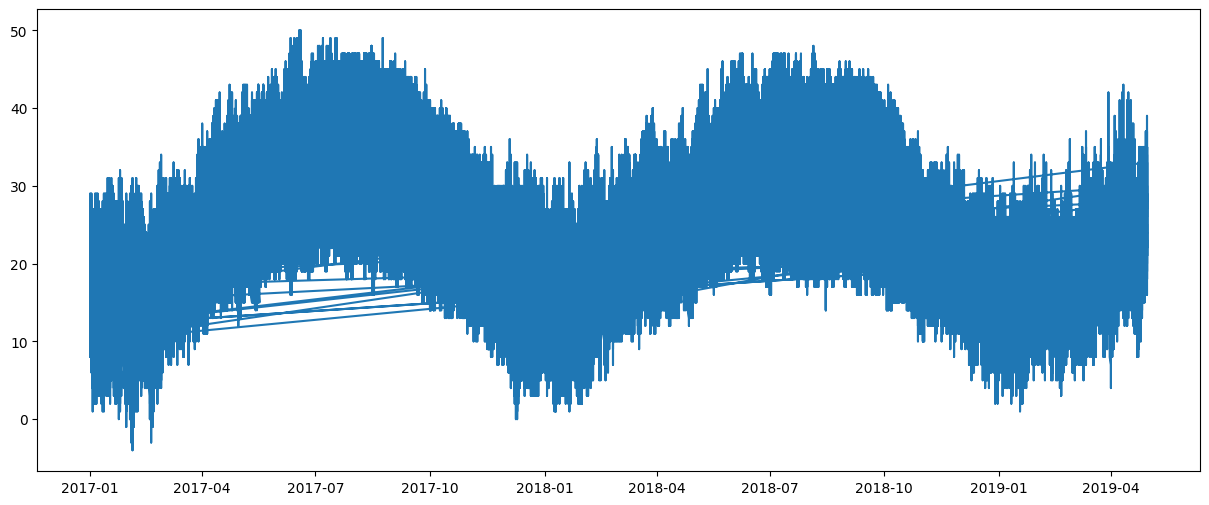

In [13]:
plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['temp'])

<Axes: >

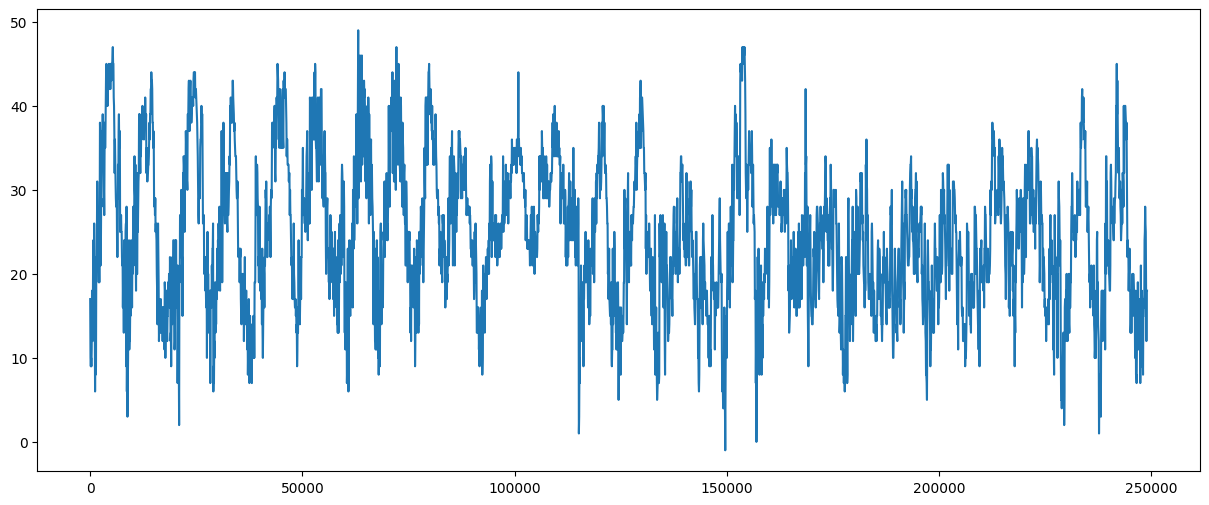

In [14]:
new_df = df.reset_index()['temp']
plt.figure(figsize=(15,6))
new_df[::72].plot()

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data=scaler.fit_transform(np.array(new_df).reshape(-1, 1))

In [16]:
scaled_data

array([[0.38888889],
       [0.38888889],
       [0.35185185],
       ...,
       [0.57407407],
       [0.55555556],
       [0.51851852]])

In [17]:
train_size = int(len(scaled_data) * .8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

In [18]:
len(train)

199218

In [19]:
n_past = 60

# Prepare train set
X_train, y_train = [], []
for i in range(n_past, len(train)):
    X_train.append(train[i - n_past:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Prepare test set
X_test, y_test = [], []
for i in range(n_past, len(test)):
    X_test.append(test[i - n_past:i, 0])
    y_test.append(test[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [20]:
print("Training set size:-")
print(X_train.shape), print(y_train.shape)
print('\n')
print("Testing set size:-")
print(X_test.shape), print(y_test.shape)

Training set size:-
(199158, 60)
(199158,)


Testing set size:-
(49745, 60)
(49745,)


(None, None)

In [21]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [22]:
model = Sequential()

model.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(GRU(50, return_sequences=True))
model.add(Dropout(0.2))

model.add(GRU(50))
model.add(Dropout(0.2))

model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 60, 50)            7950      
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 60, 50)            15300     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 gru_2 (GRU)                 (None, 50)                15300     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5

In [23]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [24]:
early_stopping = EarlyStopping(monitor='val_loss', patience=7)

model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, callbacks= [early_stopping])

Epoch 1/100
3112/3112 [==============================] - 78s 22ms/step - loss: 0.0031 - val_loss: 4.9407e-04
Epoch 2/100
3112/3112 [==============================] - 64s 21ms/step - loss: 8.8893e-04 - val_loss: 4.5432e-04
Epoch 3/100
3112/3112 [==============================] - 54s 17ms/step - loss: 7.0651e-04 - val_loss: 4.3322e-04
Epoch 4/100
3112/3112 [==============================] - 54s 17ms/step - loss: 6.6333e-04 - val_loss: 4.2439e-04
Epoch 5/100
3112/3112 [==============================] - 57s 18ms/step - loss: 6.4276e-04 - val_loss: 3.9092e-04
Epoch 6/100
3112/3112 [==============================] - 55s 18ms/step - loss: 6.2347e-04 - val_loss: 4.2906e-04
Epoch 7/100
3112/3112 [==============================] - 55s 18ms/step - loss: 6.1437e-04 - val_loss: 4.7368e-04
Epoch 8/100
3112/3112 [==============================] - 60s 19ms/step - loss: 6.0660e-04 - val_loss: 3.8907e-04
Epoch 9/100
3112/3112 [==============================] - 87s 28ms/step - loss: 5.9712e-04 - val_loss

In [25]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1555/1555 [==============================] - 11s 7ms/step


In [26]:
# Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
# Calculate train data RMSE
print(math.sqrt(mean_squared_error(y_train,train_predict)))
# Calculate test data RMSE
print(math.sqrt(mean_squared_error(y_test,test_predict)))

26.396045682839052
23.940758932546853


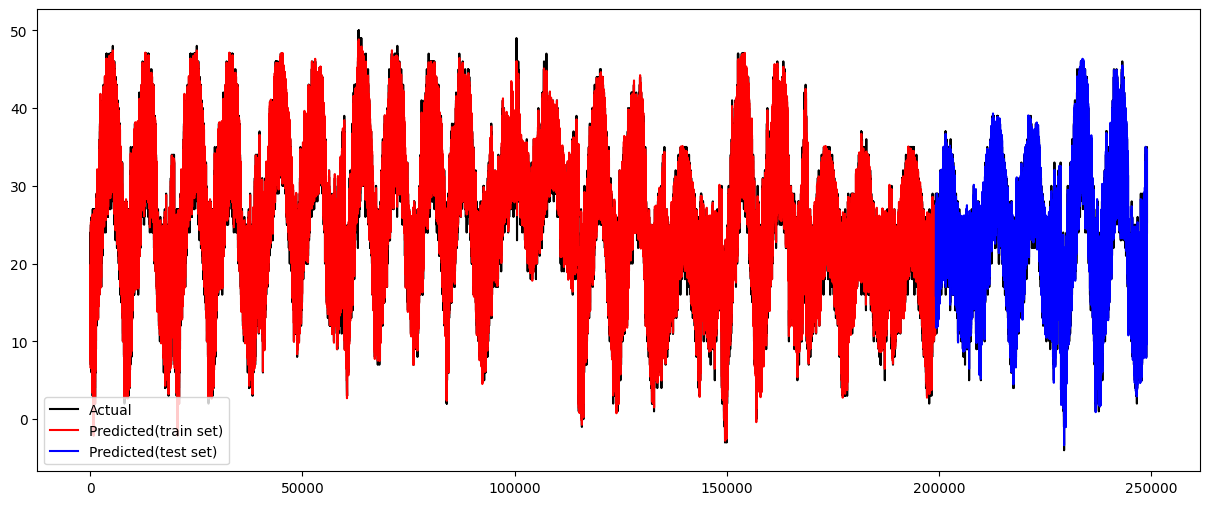

: 

In [30]:
# Set the number of previous time steps to consider for plotting
look_back = 60

# Initialize an array for plotting the train predictions
trainPredictPlot = np.empty_like(new_df, dtype=float)
trainPredictPlot[:] = np.nan
# Assign the predicted values to the appropriate location for train predictions
trainPredictPlot[look_back:len(train_predict)+look_back] = train_predict.flatten()

# Initialize an array for plotting the test predictions
testPredictPlot = np.empty_like(new_df, dtype=float)
testPredictPlot[:] = np.nan
# Calculate the starting index for the test predictions
test_start = len(new_df) - len(test_predict)
# Assign the predicted values to the appropriate location for test predictions
testPredictPlot[test_start:] = test_predict.flatten()

# Rescale the scaled data back to its original scale using the scaler
original_scaled_data = scaler.inverse_transform(scaled_data)

# Plotting the baseline data, training predictions, and test predictions
plt.figure(figsize=(15, 6))
plt.plot(original_scaled_data, color='black', label=f"Actual")
plt.plot(trainPredictPlot, color='red', label=f"Predicted(train set)")
plt.plot(testPredictPlot, color='blue', label=f"Predicted(test set)")

plt.legend()
plt.show()